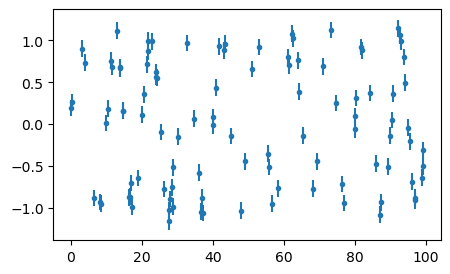

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import rustroperiods
import P4J

N = 100
mjd = np.sort(100*np.random.rand(N))
mag = np.sin(2.*np.pi*mjd/10)
err = np.ones_like(mag)*0.1
mag += np.random.randn(len(mag))*err

fig, ax = plt.subplots(figsize=(5, 3))
ax.errorbar(mjd, mag, err, fmt='.');

In [2]:
per = P4J.periodogram(method="LKSL")
per.set_data(mjd, mag, err)
%timeit -n1 -r10 per.frequency_grid_evaluation(1e-3, 3.0, 1e-4)

372 ms ± 10.2 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [4]:
#mjd = list(mjd)
#mag = list(mag)
#err = list(err)

%timeit -n3 -r10 rustroperiods.SingleBandPeriodogram(mjd, mag, err)

188 ms ± 3.95 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)


(0.0, 0.2)

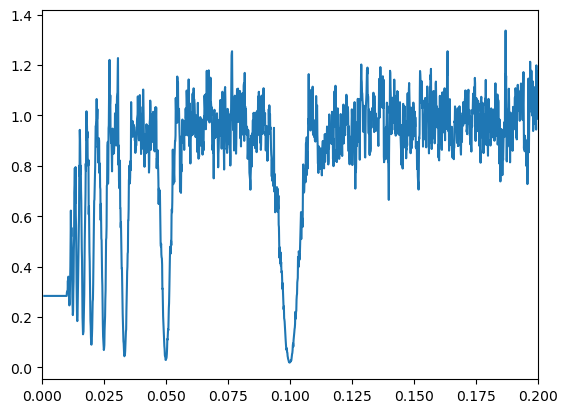

In [5]:
per = rustroperiods.SingleBandPeriodogram(mjd, mag, err)
fig, ax = plt.subplots()
ax.plot(np.arange(1e-3, 3, 1e-4), per)
ax.set_xlim([0, 0.2])